In [1]:
import pandas as pd
import numpy as np
#import autograd
import random

In [2]:
df = pd.read_csv('nice_data.csv')

In [3]:
subjects = list(df.subject.unique())
reviewers = list(df.reviewer.unique())
rm = df.score.mean()
rs = df.score.std()

n_sub = len(subjects)
n_rev = len(reviewers)
dataset = np.array(df)
total_reviews = np.zeros(n_sub)
num_reviews = np.zeros(n_sub)



for i in range(dataset.shape[0]):
    dataset[i,0] = subjects.index(dataset[i,0])
    dataset[i,1] = reviewers.index(dataset[i,1])
    #dataset[i,2] = (dataset[i,2]-rm)/rs
    
    # normalization step
    total_reviews[dataset[i,0]] += dataset[i,2]
    num_reviews[dataset[i,0]] += 1

average_reviews = total_reviews/num_reviews
np.random.shuffle(dataset)

In [4]:
reviewer_means = np.zeros(n_rev)
reviewer_std = np.zeros(n_rev)
for idx,reviewer in enumerate(reviewers):
    reviewer_means[idx] = df[df.reviewer == reviewer].score.mean()
    reviewer_std[idx] = df[df.reviewer == reviewer].score.std()

In [5]:
reviewer_biases = np.random.randn(n_rev)
subject_scores = np.random.random(n_sub)
reg_l2= 1/2
lr = 1e-9
num_iter = 5000
x0 = np.hstack([reviewer_biases,subject_scores])

In [6]:
def loss(x):
    res = 0
    rb = x[:n_rev]
    ss = x[n_rev:]
    #d = dataset[np.random.randint(dataset.shape[0])]
    #res = res + (d[2]-rb[d[1]]-ss[d[0]])**2 + reg_l2* (rb**2).sum()
    for d in dataset:
        res = res + (d[2]-rb[d[1]]-ss[d[0]])**2
    res = res+ reg_l2* (rb**2).sum()
    return res
loss(x0)

1781.39667125503

In [7]:
if False:
    J = autograd.jacobian(loss)
    x = x0
    for i in range(50):
        g = J(x)
        l = loss(x)
        x = x - lr * g
        #x = x - lr/pow(i+1,0.5) * g
        if (i % 2 == 0):
            #print(l,sum([loss(x) for _ in range(100)]))
            print(l)
        if(i % 10 == 0):
            lr = lr/4
else:
    import scipy.optimize as opt
    res = opt.minimize(loss,x0)
    x = res.x

In [8]:
res

      fun: 14.963057471861445
 hess_inv: array([[ 0.12758509,  0.07811312,  0.0691355 , ..., -0.06837197,
        -0.06671721, -0.07297755],
       [ 0.07811312,  0.15032326,  0.06421615, ..., -0.07027953,
        -0.05622966, -0.05425778],
       [ 0.0691355 ,  0.06421615,  0.224623  , ..., -0.16018604,
        -0.05973798, -0.06066084],
       ...,
       [-0.06837197, -0.07027953, -0.16018604, ...,  0.99358092,
         0.06999456,  0.06133914],
       [-0.06671721, -0.05622966, -0.05973798, ...,  0.06999456,
         1.01276348,  0.05946703],
       [-0.07297755, -0.05425778, -0.06066084, ...,  0.06133914,
         0.05946703,  1.01557393]])
      jac: array([ 8.34465027e-07, -1.43051147e-06,  1.90734863e-06,  1.54972076e-06,
       -2.38418579e-07,  1.19209290e-07,  2.38418579e-07,  9.53674316e-07,
        2.38418579e-07,  1.43051147e-06, -4.76837158e-07,  4.76837158e-07,
        0.00000000e+00, -3.57627869e-07,  1.19209290e-06,  2.38418579e-07,
        1.90734863e-06,  2.02655792

In [9]:
reviewer_biases = x[:n_rev]
subject_scores = x[n_rev:]

In [10]:
reviewer_biases

array([ 0.04864337,  0.23865021, -0.01704388,  0.06026751, -0.15369095,
       -0.30738227, -0.38734374, -0.00307291,  0.123786  ,  0.04255652,
        0.03780798,  0.02459827, -0.25470718,  0.54693157])

In [11]:
print('{}\t\t{}'.format('name','bias'))

for i in np.argsort(reviewer_biases):
    print('{}\t\t{:.2f}'.format(reviewers[i],reviewer_biases[i]))

name		bias
frank		-0.39
pat		-0.31
trudy		-0.25
carol		-0.15
erin		-0.02
alice		-0.00
peggy		0.02
mallory		0.04
bob		0.04
craig		0.05
eve		0.06
vanna		0.12
dave		0.24
victor		0.55


In [12]:
print('{}\t\t{}\t{}'.format('name','mean','std'))
for i in np.argsort(reviewer_means):
    print('{}\t\t{:.2f}\t{:.2f}'.format(reviewers[i],reviewer_means[i],reviewer_std[i]))

name		mean	std
trudy		2.37	1.07
mallory		2.74	1.12
carol		2.92	0.83
craig		2.95	0.93
peggy		2.99	0.92
alice		3.03	0.68
eve		3.08	0.88
pat		3.09	1.20
bob		3.13	0.70
frank		3.14	1.07
dave		3.17	0.67
victor		3.49	0.13
vanna		3.53	0.71
erin		3.63	0.43


In [13]:
subject_scores

array([1.3354381 , 3.01040332, 2.44130743, 3.67240559, 2.63009644,
       4.08082048, 3.44665017, 4.34313643, 3.68842265, 3.30278705,
       3.89218966, 3.53012191, 3.77324006, 2.14193838, 3.75957988,
       3.0729149 , 2.82013855, 3.25858385, 3.83681594, 1.11829569,
       3.33813565, 2.33135179, 3.38160038, 3.94119895, 2.75614779,
       2.76275317, 1.10844979, 1.27811078, 1.56900856, 2.51580553,
       3.47886318, 3.27386767, 3.46445939, 2.56801545, 2.90919911,
       3.53690177, 3.19929647, 3.39543604, 2.60782811, 3.63834153,
       2.64542673, 2.60856546, 1.64564625, 3.42263757, 3.07259822,
       2.52892957, 4.07683214, 3.64365399, 3.64365363, 2.45375136,
       3.19197994, 2.80379039, 3.82046748, 3.55883545, 2.28306625,
       1.31059155, 1.54995187, 2.71116056, 3.68363458, 3.55836751,
       3.73444291, 3.28701938, 3.29240948, 2.84377044, 4.08384359,
       3.28838408, 4.03984155, 3.89988866, 3.60845681, 4.31333672,
       3.83681597, 4.41146054, 2.85158127, 2.27876671, 3.03756

In [14]:
average_reviews

array([1.47908463, 3.02620304, 2.49576244, 3.82186393, 2.67257597,
       3.73345717, 3.29142333, 4.39650791, 3.55664363, 3.24721995,
       3.93237239, 3.35772841, 3.60084702, 2.00952523, 3.79976224,
       3.02620304, 2.80518612, 3.20301657, 3.82186393, 1.06272878,
       3.29142333, 2.16781336, 3.42403348, 3.77766055, 2.80518612,
       2.80518612, 1.        , 1.16966095, 1.46055923, 2.40735567,
       3.51244025, 3.15881319, 3.46823687, 2.62837259, 2.93779627,
       3.55664363, 3.07040642, 3.42403348, 2.89359289, 3.9102707 ,
       2.93779627, 2.80518612, 1.70010154, 3.46823687, 3.15881319,
       2.67257597, 4.13128761, 3.68925378, 3.68925378, 2.53996582,
       3.33562672, 2.8493895 , 3.86606732, 3.6450504 , 2.23054214,
       1.25806771, 1.68157614, 2.8493895 , 3.82186393, 3.60084702,
       3.86606732, 3.46823687, 3.42403348, 2.98199965, 3.95447408,
       3.20301657, 3.95447408, 3.9102707 , 3.68925378, 4.39650791,
       3.82186393, 4.39650791, 2.93779627, 2.31894891, 2.98199

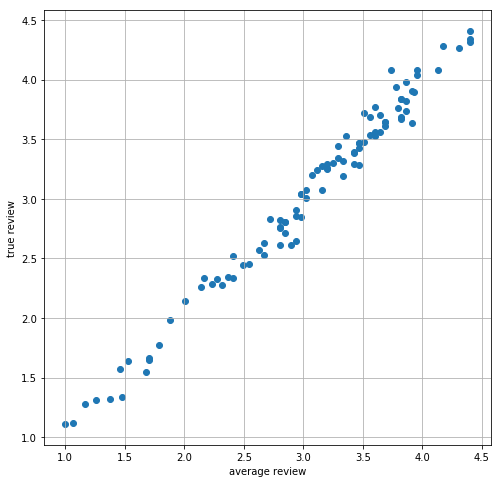

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
#plt.scatter(average_reviews,subject_scores+(average_reviews.mean()-subject_scores.mean()))
plt.scatter(average_reviews,subject_scores)
plt.xlabel('average review')
plt.ylabel('true review')
maxv = max(abs(average_reviews).max(),abs(subject_scores).max())
#plt.xlim(-maxv,maxv)
#plt.ylim(-maxv,maxv)
plt.grid(True)
plt.show()